<a href="https://www.kaggle.com/code/sunethjayawardana/breast-cancer-ml-bagging-and-boosting?scriptVersionId=160392407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


# Breast Cancer(Bagging, Boosting, Hyperparameter Tuning)

## 1. Load Dataset, Inspect and Clean

In [2]:
# Load dataset

# Load dataset
breast_cancer = pd.read_csv("/kaggle/input/breast-cancer/Breast_Cancer.csv")

#Inspect Dataset
breast_cancer.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


Looking at the columsn names

In [3]:
print(list(breast_cancer.columns))


['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


Remove unwanted spaces from the column names

In [4]:
breast_cancer.columns = breast_cancer.columns.str.strip(" ")
print(list(breast_cancer.columns))
breast_cancer.head()

['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
# Print summary statistics
breast_cancer_description = breast_cancer.describe()
print(breast_cancer_description)

print('\n')

# Print DataFrame information
breast_cancer_info = breast_cancer.info()
print(breast_cancer_info)

               Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000  


<class 'pandas.core.frame.DataFram

Looking at the dataset it is clear that there are 15 columns with 5 of them numerical data and all others are non-numerical data. The non-numerical columns have catagorical data. We nedd to understand the structure or the frequency in the catagores of each column before we do any EDA.

In [6]:
# Looking at the catagories
print('Race: ', breast_cancer["Race"].unique() )
print('Marital Status: ', breast_cancer["Marital Status"].unique() )
print('T Stage: ', breast_cancer["T Stage"].unique() )
print('N Stage: ', breast_cancer["N Stage"].unique() )
print('6th Stage: ', breast_cancer["6th Stage"].unique() )
print('differentiate: ', breast_cancer["differentiate"].unique() )
print('Grade: ', breast_cancer["Grade"].unique() )
print('A Stage: ', breast_cancer["A Stage"].unique() )
print('Estrogen Status: ', breast_cancer["Estrogen Status"].unique() )
print('Progesterone Status: ', breast_cancer["Progesterone Status"].unique() )
print('Status: ', breast_cancer["Status"].unique() )


Race:  ['White' 'Black' 'Other']
Marital Status:  ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage:  ['T1' 'T2' 'T3' 'T4']
N Stage:  ['N1' 'N2' 'N3']
6th Stage:  ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate:  ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade:  ['3' '2' '1' ' anaplastic; Grade IV']
A Stage:  ['Regional' 'Distant']
Estrogen Status:  ['Positive' 'Negative']
Progesterone Status:  ['Positive' 'Negative']
Status:  ['Alive' 'Dead']


We can see all the columns have catagories the maximum number of catagories coming from "Grade" column and "Martial Status" while minnimum number coming from "Status", "Progesteron Status", "Estrogen Status" and "A Stage" columns.

## 2. EDA

First look at the correlation between numerical data.

                             Age  Tumor Size  Regional Node Examined  \
Age                     1.000000   -0.077215               -0.033345   
Tumor Size             -0.077215    1.000000                0.104352   
Regional Node Examined -0.033345    0.104352                1.000000   
Reginol Node Positive   0.012586    0.242322                0.411580   
Survival Months        -0.009390   -0.086901               -0.022054   

                        Reginol Node Positive  Survival Months  
Age                                  0.012586        -0.009390  
Tumor Size                           0.242322        -0.086901  
Regional Node Examined               0.411580        -0.022054  
Reginol Node Positive                1.000000        -0.135214  
Survival Months                     -0.135214         1.000000  




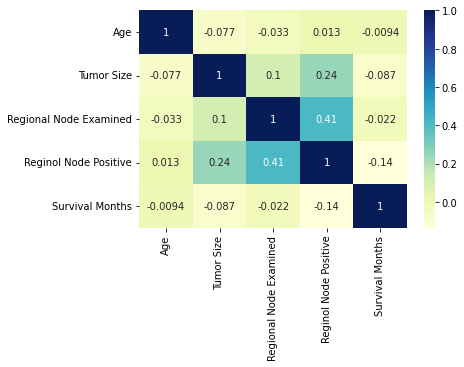

In [7]:
# looking at the correlation of numerical data
print(breast_cancer.corr())
print("\n")

# creating mask
#mask = np.triu(np.ones_like(breast_cancer.corr()))
corplot = sns.heatmap(breast_cancer.corr(),cmap="YlGnBu", annot=True)

Looking at the correlation heatmap the positive correlations are coming from: "Age" with "Regional Node Positive", "Tumor Size" with "Regional Node Examined","Tumor Size" with "Regional Node Positive" and "Regional Node Positive" with "Regional Node Examined". All other correlations are negative.

Look at the catagorical data of "Race" and "Status"

Frequency of data points in Status column
Alive    3408
Dead      616
Name: Status, dtype: int64


Frequency of data points in Race column
White    3413
Other     320
Black     291
Name: Race, dtype: int64




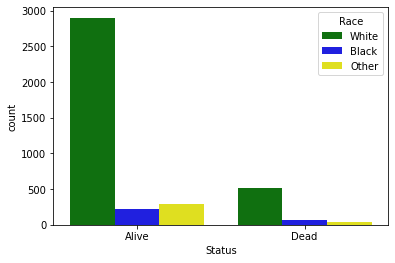

In [8]:

print("Frequency of data points in Status column")

print(breast_cancer["Status"].value_counts())

print("\n")
print("Frequency of data points in Race column")
print(breast_cancer["Race"].value_counts())
palette_colors = {"White": "green", "Black": "blue", "Other": "yellow"}
sns.countplot(x="Status", data=breast_cancer, hue="Race",palette= palette_colors)
print("\n")


We can see the numer of "White" in Race column is very large compaired to the other races. mLets look at them in percentage

In [9]:
#Finding total number of race
tot =breast_cancer["Race"].value_counts().sum()
# Finding only white race
wh=breast_cancer[breast_cancer["Race"]=="White"]
# Finding only Black race
bl = breast_cancer[breast_cancer["Race"]=="Black"]
#finding only other Races
oth = breast_cancer[breast_cancer["Race"]=="Other"]
# calculating percentages of different races

print("White percentage:", wh["Race"].value_counts()*100/tot)
print("Black percentage:", bl["Race"].value_counts()*100/tot)
print("Other percentage:", oth["Race"].value_counts()*100/tot)

White percentage: White    84.816103
Name: Race, dtype: float64
Black percentage: Black    7.23161
Name: Race, dtype: float64
Other percentage: Other    7.952286
Name: Race, dtype: float64


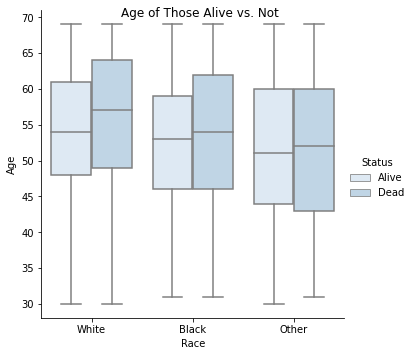

In [10]:
# Set palette to "Blues"
sns.set_palette("Blues")

# Adjust to add subgroups based on "Status"
g = sns.catplot(x="Race",
                y="Age", data=breast_cancer, 
                kind="box", hue="Status")

# Set title to "Age of Those Alive vs. Not"
g.fig.suptitle("Age of Those Alive vs. Not")
plt.show()

"Black" and "other" races are neglegible when considering the "white" race. If we take those two races it will impact the accuracy of the model. We will drop the those two races from the dataset.

In [11]:
#Drop "Black" and "Other" races rows
breast_cancer = breast_cancer[breast_cancer["Race"]=="White"]
# Looking at the new data frame Race column
breast_cancer["Race"].value_counts()

White    3413
Name: Race, dtype: int64

We have droped the other races axcept white race. Now lets look at the structure of the other columns

In [12]:
print("Frequency of data points in Marital Status column")
print(breast_cancer["Marital Status"].value_counts())
print("\n")


Frequency of data points in Marital Status column
Married      2293
Single        480
Divorced      417
Widowed       190
Separated      33
Name: Marital Status, dtype: int64




Looking at the alive and dead depeding on the "Marital Status column"

<AxesSubplot:xlabel='Status', ylabel='count'>

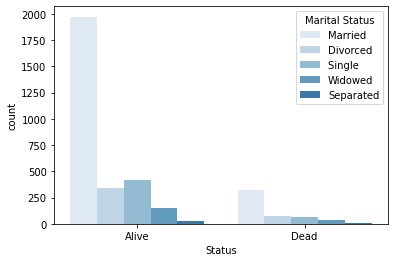

In [13]:
#palette_colors = {"Married": "green", "Single": "blue", "Divorced": "yellow", "Widowed" : "red", "Separated" : "black"}
#Print countplot 
sns.countplot(x="Status", data=breast_cancer, hue="Marital Status")


In [14]:
print("Frequency of data points in T Stage column")
print(breast_cancer["T Stage"].value_counts())

Frequency of data points in T Stage column
T2    1492
T1    1373
T3     459
T4      89
Name: T Stage, dtype: int64


# 3. Preprocessing data for modeling

We are going to model the data using bagging method before we do any modeling we need to convert non-numerical data to numerical. We are going to prepropcess data for that

First drop the race column because we are only considering the White since data for othe races are insignificant

In [15]:
#Drop race column
breast_cancer = breast_cancer.drop("Race", axis=1)
#Looking at new dataframe
breast_cancer.head()

,Age,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


#### We need to change non-numerical columns to numerical, The Marital Status column has 5 variables so we will replace  ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']= [1,2,3,4,5], T Stage:  ['T1' 'T2' 'T3' 'T4']=[1,2,3,4],N Stage:  ['N1' 'N2' 'N3']=[1,2,3], 6th Stage:  ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']=[1,2,3,4,5] differentiate:  ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated','Undifferentiated']=[1,2,3,4]

In [16]:
#Replace all non  numerical values
breast_cancer=breast_cancer.replace( ['Married' ,'Divorced', 'Single ', 'Widowed', 'Separated','T1', 'T2', 'T3', 'T4','N1', 'N2', 'N3','IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB','Poorly differentiated', 'Moderately differentiated', 'Well differentiated',
 'Undifferentiated','3' ,'2', '1', ' anaplastic; Grade IV','Regional', 'Distant','Positive' ,'Negative','Alive', 'Dead'],[1,2,3,4,5,1,2,3,4,1,2,3,1,2,3,4,5,1,2,3,4,3,2,1,4,1,2,1,0,1,0])
print(breast_cancer.head())
print("/n")
breast_cancer.info()

   Age  Marital Status  T Stage  N Stage  6th Stage  differentiate  Grade  \
0   68               1        1        1          1              1      3   
1   50               1        2        2          2              2      2   
2   58               2        3        3          3              2      2   
3   58               1        1        1          1              1      3   
4   47               1        2        1          4              1      3   

   A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0        1           4                1                    1   
1        1          35                1                    1   
2        1          63                1                    1   
3        1          18                1                    1   
4        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60       1  


#### We have converted all the non-numerical data to numerical data, now we can use this for ML

# 4. Fitting the model using Baggin (Booststrap Aggregation)

In [17]:
#  Import models and utility fucntions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Segregate features and labels into separate variables
X,y = breast_cancer.iloc[:,:-1].values, breast_cancer.iloc[:,-1].values

# set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, stratify=y,random_state=SEED)

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf=0.16, random_state=SEED)

# Instantiate a BaggingClassifire "bc"
bc = BaggingClassifier(base_estimator =dt, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the teaining set
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Classifire: {:.3f}".format(accuracy))

Accuracy of Bagging Classifire: 0.851


#### Looking at the accuracy on average of 85.1% instances are sampled by models there are other 14.9% are not sampled or OOB (out of bag instances) lets again evaluate the model with OOB

In [18]:
# Instantiate a BaggingClassifire "bc" with oob_score= True
bc = BaggingClassifier(base_estimator =dt,oob_score=True, n_estimators=300, n_jobs=-1)

# Fit 'bc' to the teaining set
bc.fit(X_train,y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
#Extract the oob accuracy from "bc"
oob_accuracy = bc.oob_score_
#print test set accuracy
print("Accuracy of Test set: {:.3f}".format(accuracy))

# Print oob accuracy
print("OOB accuracy: {:.3f}".format(oob_accuracy))

Accuracy of Test set: 0.851
OOB accuracy: 0.851


We can use boosting to get more accurate result

# 5. Use AdaBoost Classification with the dataset

In [19]:
# Import AdaBoostClassifire
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth = 1, random_state=SEED)

# Instantiate an AdaBoost classifire "adab_clf"
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators =100 )

#fit "adb_clf" to the training set
adb_clf.fit(X_train,y_train)

#Predict the test set probability of positive class

y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

#Evaluate test-set roc_auc_score
adb_clf_auc_score = roc_auc_score(y_test,y_pred_proba)

#Print adb_clf_auc_score
print("ROC AUC Score: {:.2f}".format(adb_clf_auc_score))

ROC AUC Score: 0.85


# 6. Hyperparameter Tuning

In [20]:
# Instantiate an DecisionTreeClassifire as "dt"
dt = DecisionTreeClassifier(random_state = SEED)

# Inspect the hyperparameters in "dt"

print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


We are only going to change the 'max_depth', 'min_samples_leaf and 'max_features'

In [21]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of parameters
params_dt = {'max_depth':[3,4,5,6], 'min_samples_leaf':[0.04,0.06,0.08],'max_features':[0.2,0.4,0.6,0.8]}

# Instantiate a 10 fold CV grid search object 'grid_dt'
grid_dt=GridSearchCV(estimator=dt, param_grid = params_dt, scoring = "accuracy", cv= 10, n_jobs =-1)

#fit grid_dt to train

grid_dt.fit(X_train,y_train)

# Extract the best parametrs from grid

best_hyperparams = grid_dt.best_params_

print("Best Hyperparameters:\n",best_hyperparams)

print("\n")

# Extract the best model from grid_dt
best_model = grid_dt.best_estimator_

# Evaluate the test accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of the best model:{:.3f}".format(test_acc))

Best Hyperparameters:
 {'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 0.04}


Test set accuracy of the best model:0.893


Hyperparameter tuning improved the accruacy from 85% to 89%